In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from google.colab import files
uploaded = files.upload()

Saving UberDataset.csv to UberDataset.csv


In [3]:
import pandas as pd
df = pd.read_csv('UberDataset.csv')
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


Installing & Importing Libraries

In [4]:
# 📦 Imports
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import folium
from geopy.geocoders import Nominatim
import warnings
warnings.filterwarnings('ignore')

# Set seaborn style
sns.set(style='whitegrid')


Data Cleaning

In [5]:
# Convert date columns to datetime
df['START_DATE'] = pd.to_datetime(df['START_DATE'], errors='coerce')
df['END_DATE'] = pd.to_datetime(df['END_DATE'], errors='coerce')

# Drop duplicates
df.drop_duplicates(inplace=True)

# Drop rows with critical missing values
df.dropna(subset=['CATEGORY', 'START', 'STOP', 'END_DATE'], inplace=True)

# Add derived columns
df['Month'] = df['START_DATE'].dt.to_period('M')
df['Month_Num'] = df['START_DATE'].dt.month

# Summary
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 420 entries, 0 to 1047
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   START_DATE  420 non-null    datetime64[ns]
 1   END_DATE    420 non-null    datetime64[ns]
 2   CATEGORY    420 non-null    object        
 3   START       420 non-null    object        
 4   STOP        420 non-null    object        
 5   MILES       420 non-null    float64       
 6   PURPOSE     261 non-null    object        
 7   Month       420 non-null    period[M]     
 8   Month_Num   420 non-null    int32         
dtypes: datetime64[ns](2), float64(1), int32(1), object(4), period[M](1)
memory usage: 31.2+ KB


,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,Month,Month_Num
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01,1
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NaN,2016-01,1
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01,1
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01,1
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01,1


Univariate Visualizations

A. Miles Distribution

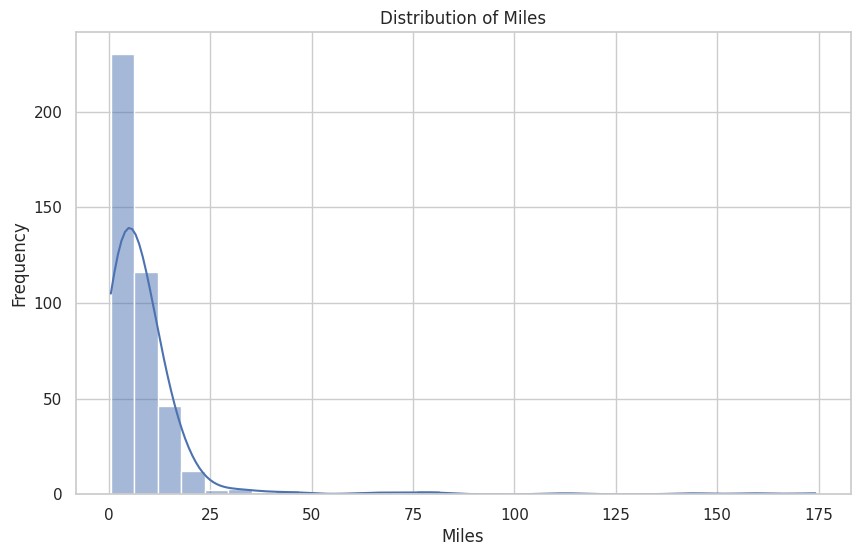

In [6]:
plt.figure(figsize=(10, 6))
sns.histplot(df['MILES'], bins=30, kde=True)
plt.title('Distribution of Miles')
plt.xlabel('Miles')
plt.ylabel('Frequency')
plt.show()

B. Rides by Category

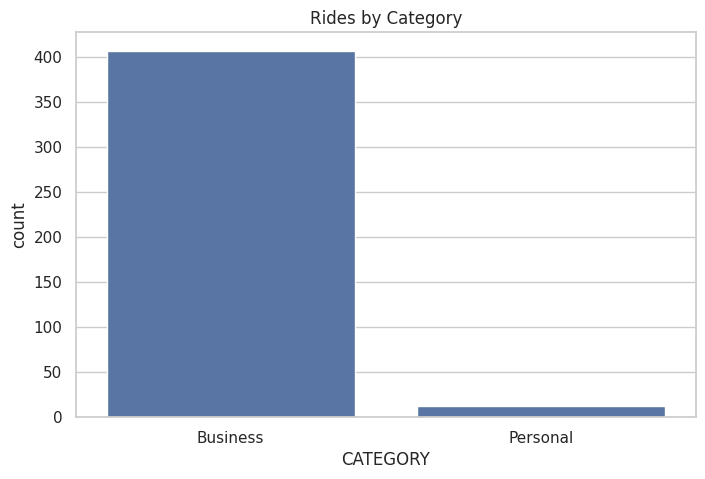

In [7]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='CATEGORY')
plt.title('Rides by Category')
plt.show()

C. Rides by Purpose

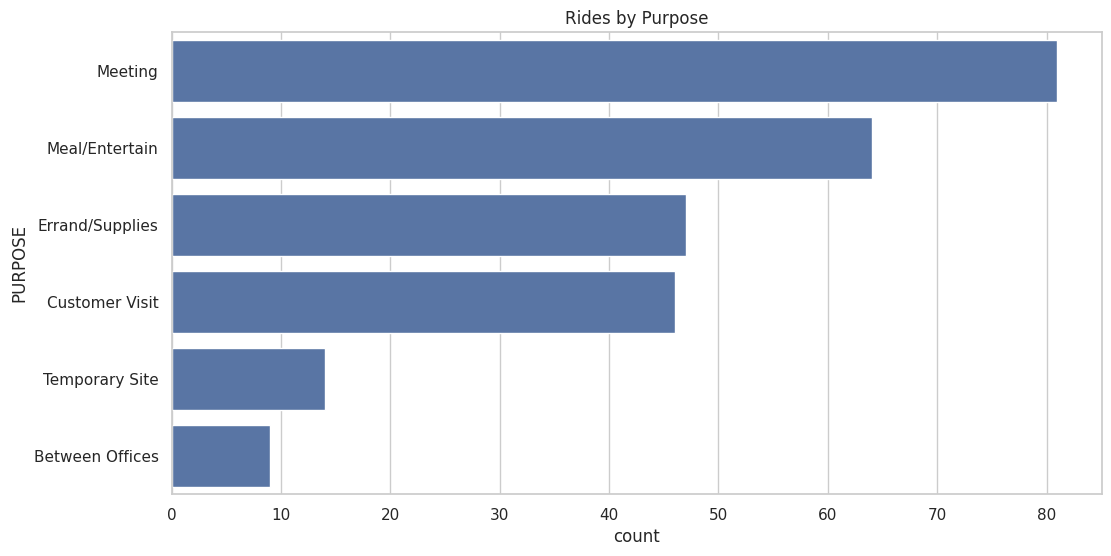

In [8]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df[df['PURPOSE'].notna()], y='PURPOSE', order=df['PURPOSE'].value_counts().index)
plt.title('Rides by Purpose')
plt.show()

D. Monthly Ride Volume

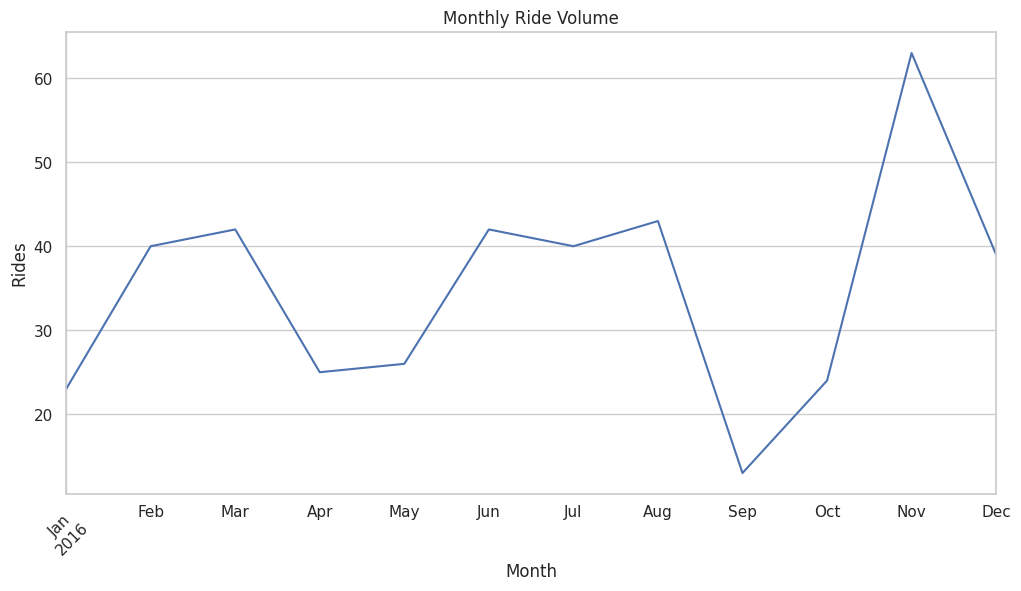

In [9]:
monthly_trips = df.groupby('Month').size()
monthly_trips.plot(figsize=(12, 6))
plt.title('Monthly Ride Volume')
plt.xlabel('Month')
plt.ylabel('Rides')
plt.xticks(rotation=45)
plt.show()

Bivariate Visualizations

A. Miles by Category

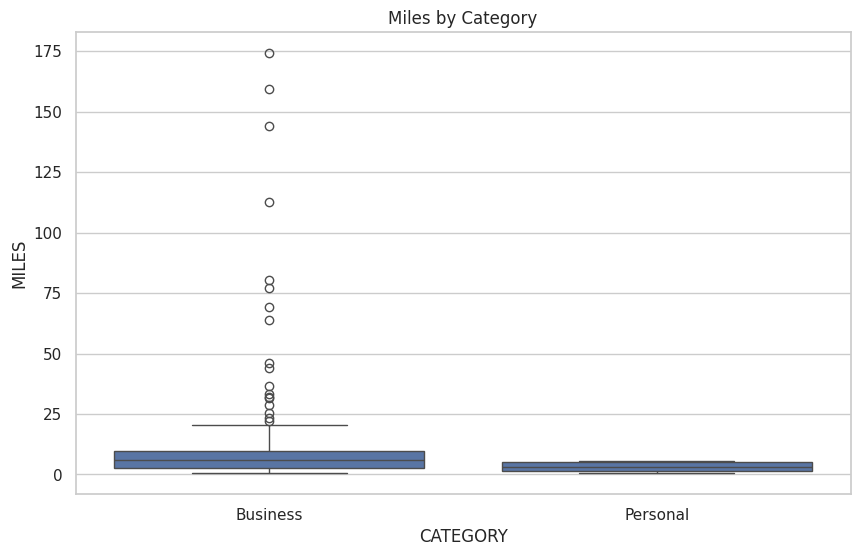

In [11]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='CATEGORY', y='MILES')
plt.title('Miles by Category')
plt.show()

B. Miles by Top 6 Purposes

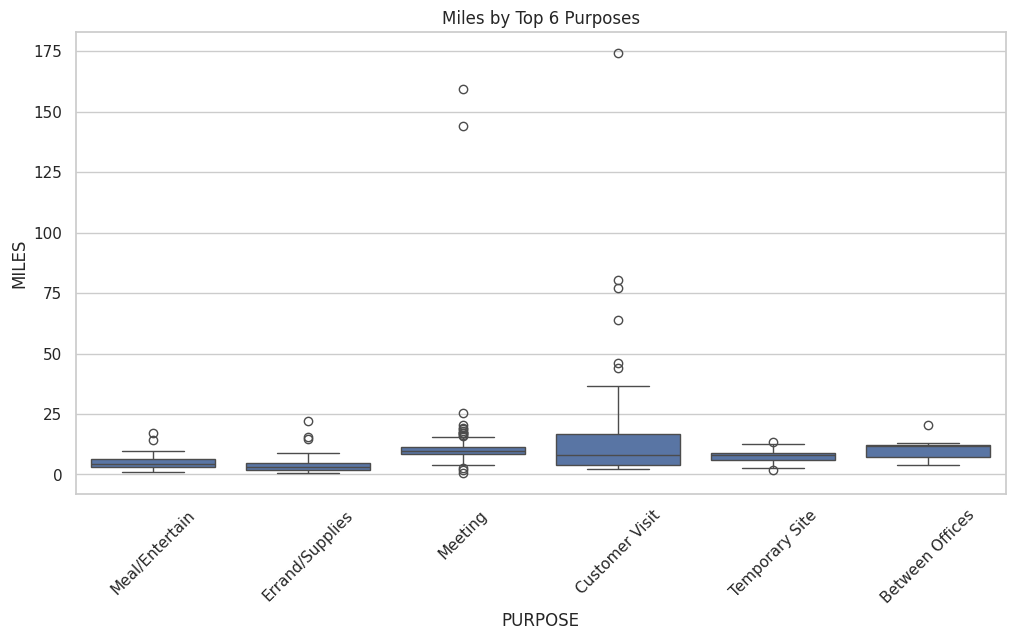

In [12]:
top_purposes = df['PURPOSE'].value_counts().head(6).index
filtered_df = df[df['PURPOSE'].isin(top_purposes)]

plt.figure(figsize=(12, 6))
sns.boxplot(data=filtered_df, x='PURPOSE', y='MILES')
plt.xticks(rotation=45)
plt.title('Miles by Top 6 Purposes')
plt.show()

C. Correlation Matrix

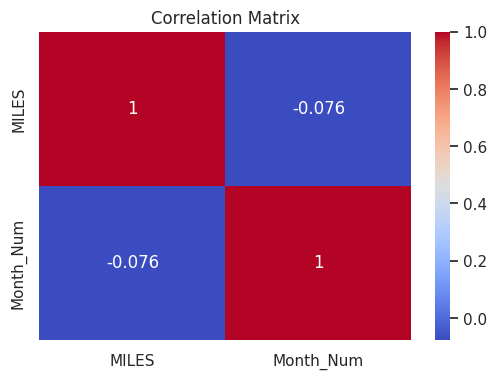

In [13]:
corr = df[['MILES', 'Month_Num']].corr()
plt.figure(figsize=(6, 4))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

**Mapping (Top Locations)**

In [14]:
# Get top locations from START and STOP
top_locations = list(set(
    df['START'].value_counts().head(10).index.tolist() +
    df['STOP'].value_counts().head(10).index.tolist()
))

# Geocode locations
geolocator = Nominatim(user_agent="uber-map")
location_coords = {}
for loc in top_locations:
    try:
        geo = geolocator.geocode(loc, timeout=10)
        if geo:
            location_coords[loc] = (geo.latitude, geo.longitude)
    except:
        continue

# Create map
m = folium.Map(location=[35.7796, -78.6382], zoom_start=4)  # Center on NC
for loc, coord in location_coords.items():
    folium.Marker(location=coord, popup=loc).add_to(m)

m


In [15]:
# Export cleaned dataset (if needed)
df.to_csv('UberDataset_Cleaned.csv', index=False)

# Download CSV
from google.colab import files
files.download('UberDataset_Cleaned.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>